In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl 

In [3]:
%matplotlib inline

In [5]:
path = r"C:\Users\justi\Citi Bike Analysis\02 Data"

In [13]:
df= pd.read_csv (r"C:\Users\justi\Citi Bike Analysis\df_cleaned.csv")

In [14]:
df.shape

(50000, 15)

In [15]:
df.head()

,weekday,start_hour,start_time,start_station_latitude,start_station_longitude,end_time,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender,Trip category,trip_category,Trip Category
0,0,18,2013-09-09 18:18:55,40.754666,-73.991382,2013-09-09 18:35:28,40.742388,-73.997262,993,0,1968.0,2,Short Trip,Mid Length Trip,Mid Length Trip
1,3,18,2013-09-12 18:38:53,40.719392,-74.002472,2013-09-12 18:48:34,40.728419,-73.987140,581,0,1983.0,1,Short Trip,Mid Length Trip,Mid Length Trip
2,2,19,2013-09-18 19:44:04,40.760193,-73.991255,2013-09-18 19:50:05,40.768254,-73.988639,361,0,1989.0,1,Short Trip,Mid Length Trip,Mid Length Trip
3,5,11,2013-09-28 11:54:37,40.743156,-73.974347,2013-09-28 12:03:58,40.756014,-73.967416,561,0,1988.0,2,Short Trip,Mid Length Trip,Mid Length Trip
4,5,18,2013-09-07 18:08:22,40.750450,-73.994811,2013-09-07 18:46:38,40.743943,-73.979661,2296,1,1978.0,0,NaN,NaN,Long Trip


# Elbow Technique

In [16]:
num_cl = range(1, 10) 
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [19]:
df['start_time'] = pd.to_datetime(df['start_time']).astype('int64') / 10**9
df['end_time'] = pd.to_datetime(df['end_time']).astype('int64') / 10**9

In [21]:
df.drop(columns=['Trip category', 'trip_category', 'Trip Category'], inplace=True)

In [22]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))]

C:\Users\justi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\justi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\justi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\justi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

In [23]:
score

[-5.363032252349281e+16,
 -1.3349742700677322e+16,
 -6025077157788444.0,
 -3333442469309519.0,
 -2219470158011686.0,
 -1516560093786734.8,
 -1120750139730784.4,
 -856289416005019.0,
 -670286490497956.8]

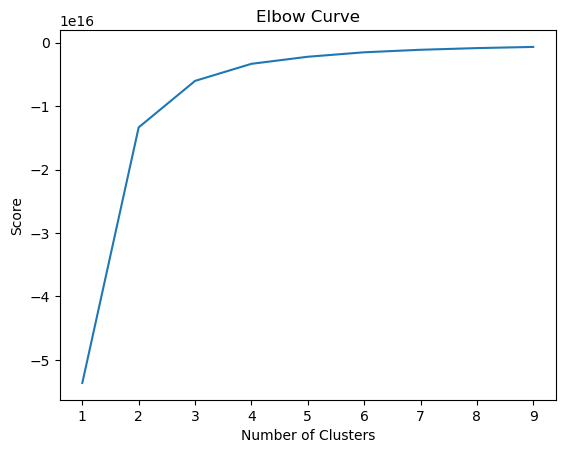

In [24]:
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

There is a large jump from 2 to 3 and evens out beyond that meaning optimal count is 3

# K-means Clustering

In [25]:
kmeans = KMeans(n_clusters = 3)

In [26]:
kmeans.fit(df)

C:\Users\justi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [27]:
df['clusters'] = kmeans.fit_predict(df)

C:\Users\justi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [28]:
df.head()

,weekday,start_hour,start_time,start_station_latitude,start_station_longitude,end_time,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender,clusters
0,0,18,1.378751e+09,40.754666,-73.991382,1.378752e+09,40.742388,-73.997262,993,0,1968.0,2,0
1,3,18,1.379011e+09,40.719392,-74.002472,1.379012e+09,40.728419,-73.987140,581,0,1983.0,1,2
2,2,19,1.379533e+09,40.760193,-73.991255,1.379534e+09,40.768254,-73.988639,361,0,1989.0,1,2
3,5,11,1.380369e+09,40.743156,-73.974347,1.380370e+09,40.756014,-73.967416,561,0,1988.0,2,1
4,5,18,1.378577e+09,40.750450,-73.994811,1.378580e+09,40.743943,-73.979661,2296,1,1978.0,0,0


In [29]:
df['clusters'].value_counts()

clusters
0    17363
2    17021
1    15616
Name: count, dtype: int64

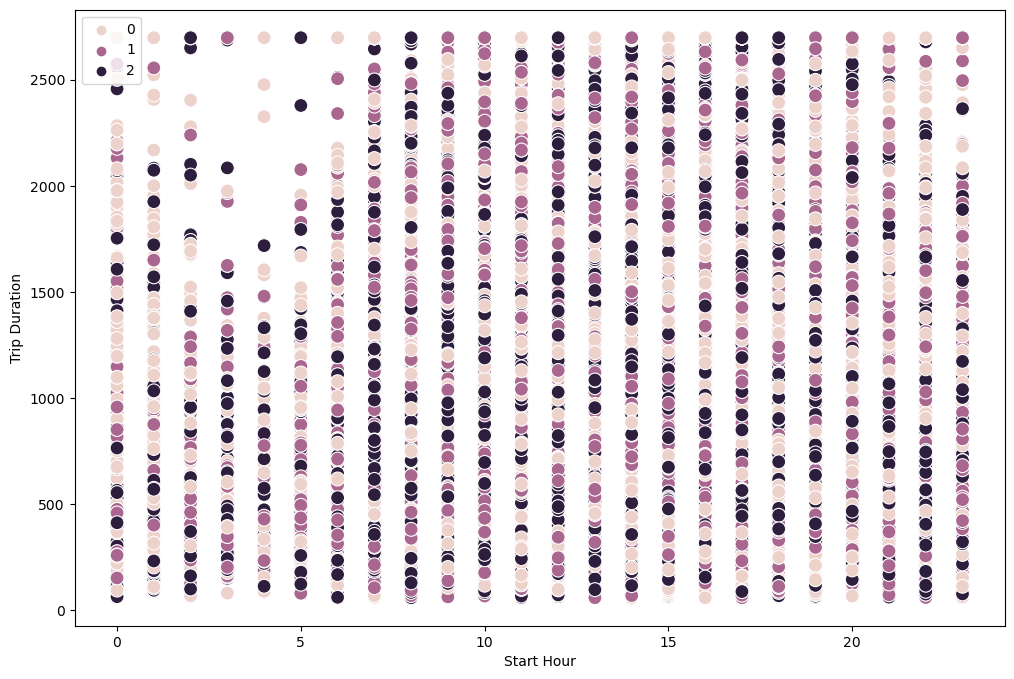

In [30]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['start_hour'], y=df['trip_duration'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Start Hour') # Label x-axis.
plt.ylabel('Trip Duration') # Label y-axis.
plt.show()

# Cluster 0 seems to be the most dominant of all the cluster although cluster 2 is very close. 1 is the lowest with approx. 1400 less than cluster 2. All three are concentrated in the Mid day hours.

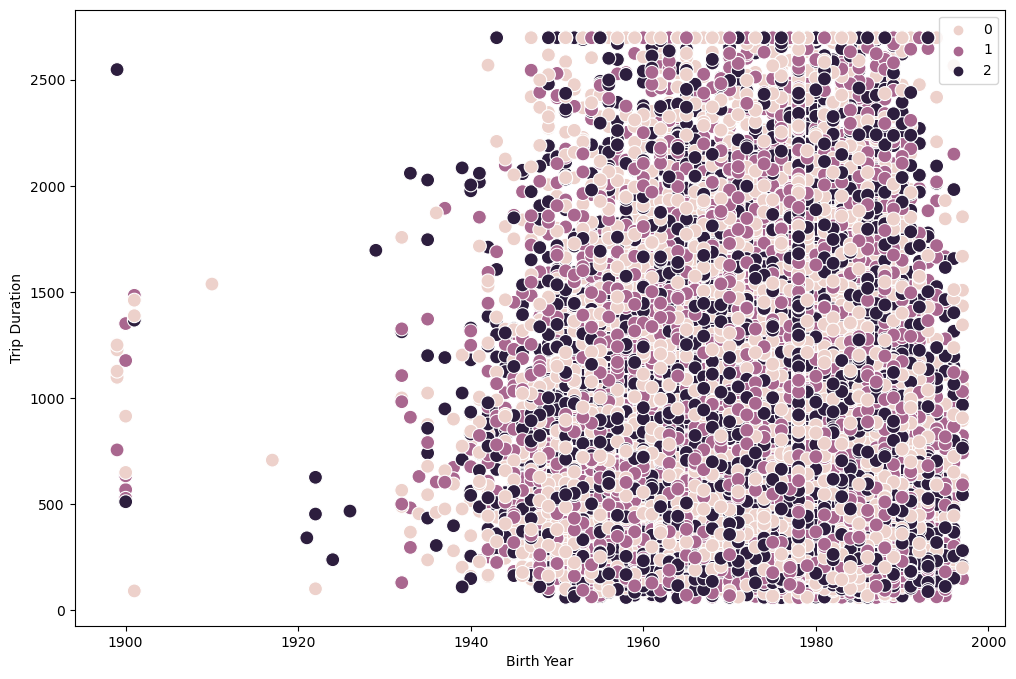

In [33]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['birth_year'], y=df['trip_duration'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Birth Year') 
plt.ylabel('Trip Duration') 
plt.show()

# This shows that most people renting bikes during the day are born between the years 1960 and 1990

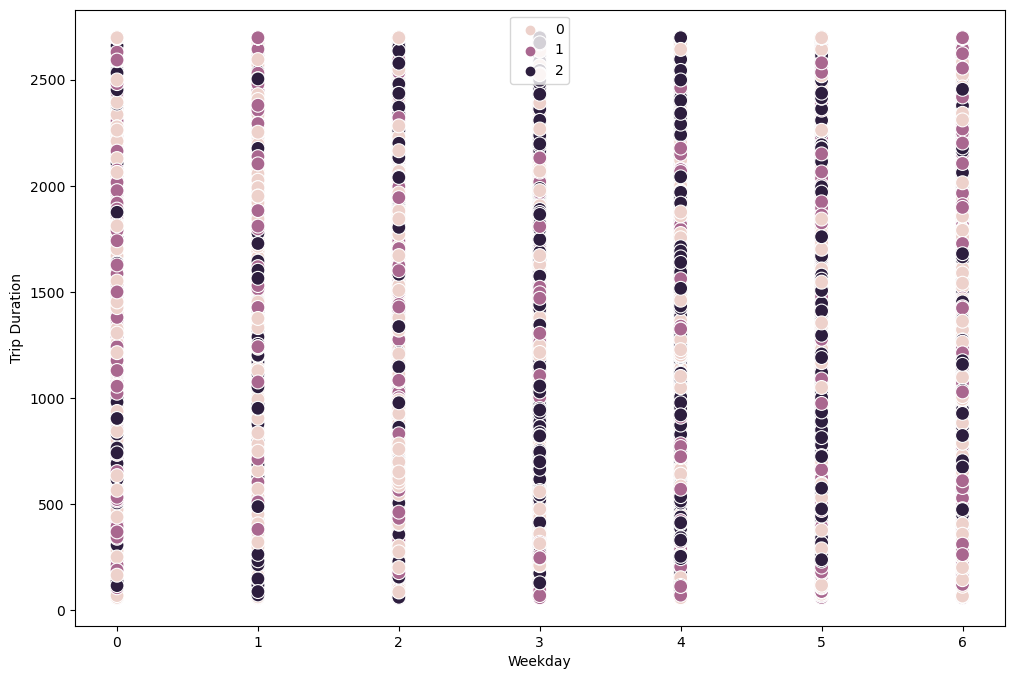

In [34]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['weekday'], y=df['trip_duration'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Weekday') 
plt.ylabel('Trip Duration') 
plt.show()

# This shows that most of cluster 0 rents during the week while 1 and 2 dominate the weekends

In [35]:
df.loc[df['clusters'] == 2, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'purple'
df.loc[df['clusters'] == 0, 'cluster'] = 'pink'

In [37]:
df.groupby('cluster').agg({'weekday':['mean', 'median', 'std'], 
                         'start_time':['mean', 'median', 'std'], 
                         'trip_duration':['mean', 'median', 'std'],
                          'birth_year':['mean', 'median', 'std']})

weekday                     start_time                \
                 mean median       std          mean        median   
cluster                                                              
dark purple  3.293402    4.0  1.745209  1.379396e+09  1.379416e+09   
pink         2.705005    2.0  2.048162  1.378510e+09  1.378497e+09   
purple       2.865843    3.0  2.209083  1.380208e+09  1.380206e+09   

                           trip_duration                      birth_year  \
                       std          mean median         std         mean   
cluster                                                                    
dark purple  246920.857282    823.836849  657.0  565.149977  1975.886963   
pink         266000.377681    858.108161  689.0  586.081580  1975.958878   
purple       218640.726542    834.226819  669.0  568.338796  1976.037334   

                                
             median        std  
cluster                         
dark purple  1978.0  10.369361  
pink         1978.0  10.190786  
purple       1978.0  10.404774